# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jimp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client -i am not exactly sure why the api_key=api_key does not work.  
newsapi = NewsApiClient(api_key='2f249c4747694b5b9cb8f5dc2359047d')
#newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q='bitcoin',
                                              language='en', 
                                              sort_by ='relevancy')   

In [5]:
sentiments = []

for articles in bitcoin_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
1,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
2,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
4,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807


In [6]:
#deeper dive, looking at building data frames on bitcoin news 
articles = []

for i in range(1,4,1):
    articles_page = newsapi.get_everything(
            q='bitcoin',
            sources='abc-news-au, news-com-au',
            domains='http://www.abc.net.au/news, http://www.news.com.au',
            from_param='2022-04-25',
            to='2022-04-30',
            language='en',
            sort_by='popularity',
            page=i)
    articles.extend(articles_page['articles'])

# outside of the loop, create the DataFrame
pd.DataFrame(articles)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",James Purtill,"From awkward kid to technocrat billionaire, El...","He's a space rocket mogul, an electric car sal...",https://www.abc.net.au/news/science/2022-04-26...,https://live-production.wcms.abc-cdn.net.au/2b...,2022-04-26T07:09:46Z,"He's a space rocket mogul, an electric car sal..."
1,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",Ian Verrender,Has Elon Musk lost the plot in buying Twitter?,Elon Musk's brilliant track record has seen ev...,https://www.abc.net.au/news/2022-04-27/elon-mu...,https://live-production.wcms.abc-cdn.net.au/02...,2022-04-26T18:58:45Z,Elon Musk has never played by the rules.\r\nHe...


In [7]:
for i in range(1,4,1):
    articles_page = newsapi.get_everything(
            q='ethereum',
            sources='abc-news-au, news-com-au',
            domains='http://www.abc.net.au/news, http://www.news.com.au',
            from_param='2022-04-25',
            to='2022-04-30',
            language='en',
            sort_by='popularity',
            page=i)
    articles.extend(articles_page['articles'])

# outside of the loop, create the DataFrame
pd.DataFrame(articles)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",James Purtill,"From awkward kid to technocrat billionaire, El...","He's a space rocket mogul, an electric car sal...",https://www.abc.net.au/news/science/2022-04-26...,https://live-production.wcms.abc-cdn.net.au/2b...,2022-04-26T07:09:46Z,"He's a space rocket mogul, an electric car sal..."
1,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",Ian Verrender,Has Elon Musk lost the plot in buying Twitter?,Elon Musk's brilliant track record has seen ev...,https://www.abc.net.au/news/2022-04-27/elon-mu...,https://live-production.wcms.abc-cdn.net.au/02...,2022-04-26T18:58:45Z,Elon Musk has never played by the rules.\r\nHe...


In [8]:
# Fetch the Bitcoin news articles
"""bitcoin_headlines = top_headlines = newsapi.get_top_headlines(q='bitcoin',
                                          sources='bbc-news,the-verge',
                                          category='business',
                                          language='en')
                                          
#bitcoin_headlines =str(bitcoin_headlines)
bitcoin_headlines"""

"bitcoin_headlines = top_headlines = newsapi.get_top_headlines(q='bitcoin',\n                                          sources='bbc-news,the-verge',\n                                          category='business',\n                                          language='en')\n                                          \n#bitcoin_headlines =str(bitcoin_headlines)\nbitcoin_headlines"

In [9]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q='ethereum',
                                              language='en', 
                                              sort_by ='relevancy')   

In [10]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in bitcoin_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head() 

,text,Compound,Positive,Negative,Neutral
0,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
1,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
2,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
4,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807


In [11]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in ethereum_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
3,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
4,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945


In [12]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.059050,0.077900,0.061350,0.860750
std,0.402490,0.065217,0.065254,0.092284
min,-0.690800,0.000000,0.000000,0.557000
25%,-0.273200,0.031500,0.000000,0.815750
50%,0.077150,0.077000,0.063000,0.885000
75%,0.355075,0.091750,0.072500,0.924250
max,0.750600,0.202000,0.241000,0.958000


In [13]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.00000,20.00000,20.000000,20.000000
mean,-0.12974,0.04120,0.070250,0.888550
std,0.40896,0.05516,0.071528,0.080061
min,-0.78450,0.00000,0.000000,0.681000
25%,-0.31745,0.00000,0.000000,0.840250
50%,-0.24975,0.00000,0.063000,0.921000
75%,0.10270,0.07650,0.077750,0.937000
max,0.73510,0.18800,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [14]:
print("Q1 - The coin that has the highest mean positive score was Bitcoin with a m p score of 0.078") 

Q1 - The coin that has the highest mean positive score was Bitcoin with a m p score of 0.078


In [15]:
print("Q2 - The coin that has the highest compound score is BTC with a score of 0.75") 

Q2 - The coin that has the highest compound score is BTC with a score of 0.75


In [16]:
print("Q3 - The coin that has the highest positive score is again BTC  with a score of 0.20 and recently Bitcoin has rebounded, because previously these scores were down.") 

Q3 - The coin that has the highest positive score is again BTC  with a score of 0.20 and recently Bitcoin has rebounded, because previously these scores were down.


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english') 
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

#sent = article.split('.')[0]
#print(sent.split(' '))
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
       
    return tokens
   


In [20]:
# Expand the default stopwords list if necessary have added some words that are related to numerical characters since they dont make sense in word cloud
sw_addons = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'may', 'ha', 'chars', 'charsapril', 'Reuters', 'based'] 
stop.append(sw_addons) 


In [21]:
# Create a new tokens column for Bitcoin breaks down into individual words
btc["tokens"] = btc.text.apply(tokenizer) 
btc.head() 

,text,Compound,Positive,Negative,Neutral,tokens
0,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
1,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
2,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."
4,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807,"[youve, ever, felt, like, introducing, vegasst..."


In [22]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer) 
eth.head() 

,text,Compound,Positive,Negative,Neutral,tokens
0,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[us, department, treasury, say, lazarus, behin..."
1,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[poster, participating, including, story, auth..."
2,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, crypto, browser, ..."
3,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
4,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2 take all text and put together as string
n=2
gramsbtc = ngrams(tokenizer(btc.text.str.cat()),n) 
Counter(gramsbtc).most_common(20) 

[(('world', 'biggest'), 4),
 (('charsmay', 'reuters'), 3),
 (('reuters', 'bitcoin'), 3),
 (('previous', 'closebitcoin'), 3),
 (('closebitcoin', 'world'), 3),
 (('biggest', 'bestknown'), 3),
 (('bestknown', 'cryptocurrency'), 3),
 (('world', 'largest'), 2),
 (('charsapril', 'reuters'), 2),
 (('jack', 'dorsey'), 2),
 (('cash', 'app'), 2),
 (('bitcoin', 'dropped'), 2),
 (('cryptocurrency', 'year'), 2),
 (('year', 'low'), 2),
 (('central', 'african'), 2),
 (('credit', 'card'), 2),
 (('bitcoin', 'mining'), 1),
 (('mining', 'site'), 1),
 (('site', 'powered'), 1),
 (('powered', 'otherwise'), 1)]

In [25]:
# Generate the Ethereum N-grams where N=2
n=2
gramseth = ngrams(tokenizer(eth.text.str.cat()),n) 
Counter(gramseth).most_common(20) 

[(('reuters', 'bitcoin'), 3),
 (('previous', 'closebitcoin'), 3),
 (('closebitcoin', 'world'), 3),
 (('world', 'biggest'), 3),
 (('biggest', 'bestknown'), 3),
 (('bestknown', 'cryptocurrency'), 3),
 (('char', 'poster'), 2),
 (('yacht', 'club'), 2),
 (('charsapril', 'reuters'), 2),
 (('ha', 'promised'), 2),
 (('bitcoin', 'dropped'), 2),
 (('cryptocurrency', 'year'), 2),
 (('year', 'low'), 2),
 (('low', 'charsmay'), 2),
 (('charsmay', 'reuters'), 2),
 (('last', 'week'), 2),
 (('us', 'department'), 1),
 (('department', 'treasury'), 1),
 (('treasury', 'say'), 1),
 (('say', 'lazarus'), 1)]

In [26]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
btctoken = tokenizer(btc.text.str.cat()) 
token_count(btctoken,10)

[('bitcoin', 13),
 ('cryptocurrency', 10),
 ('world', 8),
 ('reuters', 6),
 ('online', 4),
 ('ha', 4),
 ('dropped', 4),
 ('biggest', 4),
 ('april', 3),
 ('editor', 3)]

In [28]:
# Use token_count to get the top 10 words for Ethereum
ethtoken = tokenizer(eth.text.str.cat()) 
token_count(ethtoken,10)

[('cryptocurrency', 9),
 ('bitcoin', 6),
 ('ha', 5),
 ('ethereum', 5),
 ('last', 5),
 ('week', 5),
 ('char', 4),
 ('biggest', 4),
 ('year', 4),
 ('reuters', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [30]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=475, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 40, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

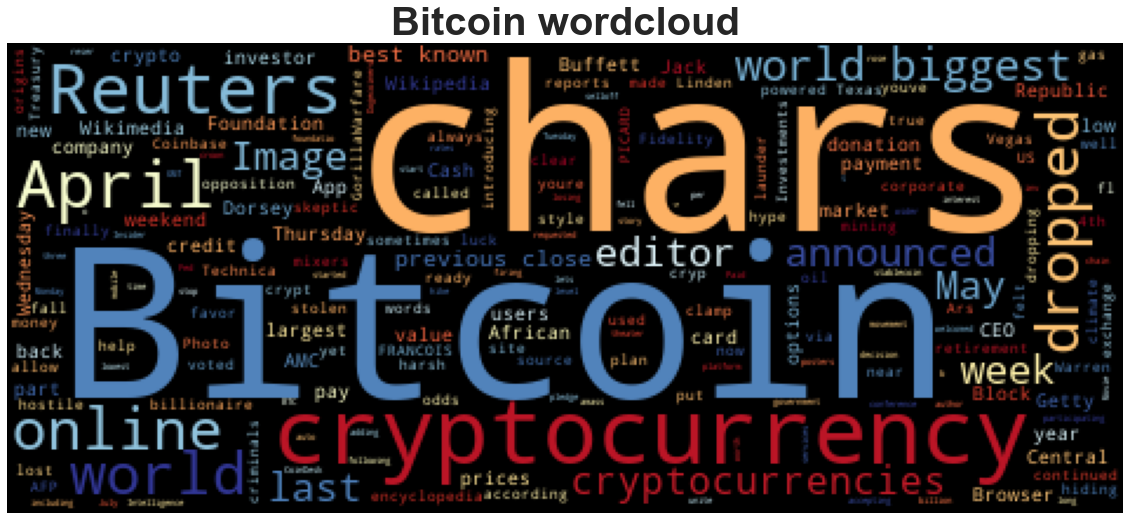

In [31]:
wordcloud(btc.text.str.cat(),  title = "Bitcoin wordcloud") 

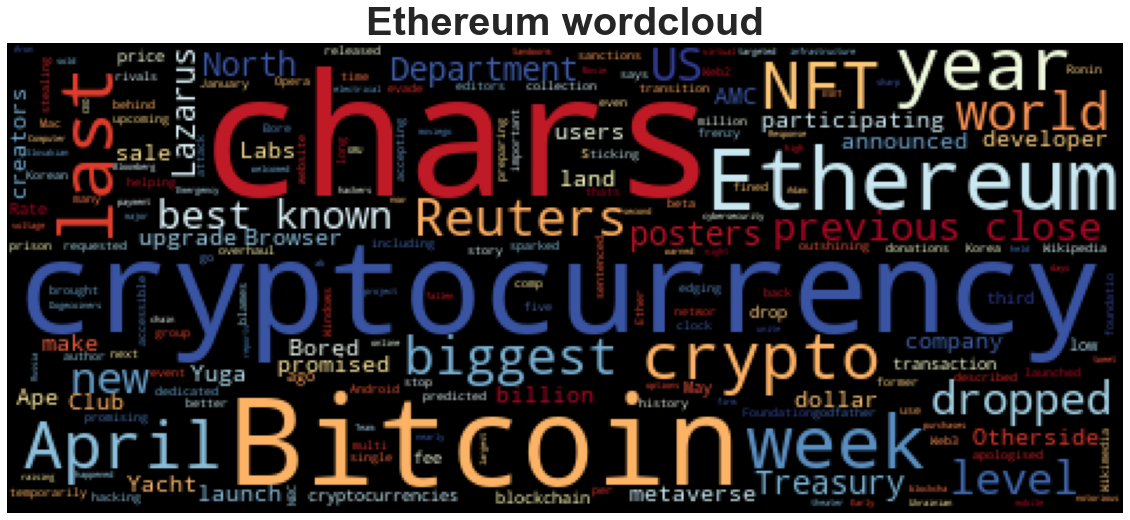

In [32]:
# Generate the Ethereum word cloud
wordcloud(eth.text.str.cat(),  title = "Ethereum wordcloud") 

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy


In [34]:
# Download the language model for SpaCy 
from spacy import displacy

In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
bitcoin_df = pd.concat([btc])
#bitcoin_headlines = nlp(btc.text)

bitcoin_df.tail() 

,text,Compound,Positive,Negative,Neutral,tokens
15,The Central African Republic has adopted bitco...,0.1280,0.042,0.000,0.958,"[central, african, republic, ha, adopted, bitc..."
16,"If you want to pay online, you need to registe...",0.5719,0.157,0.068,0.775,"[want, pay, online, need, register, account, p..."
17,"May 5 (Reuters) - Block Inc (SQ.N), the paymen...",-0.6908,0.000,0.183,0.817,"[may, reuters, block, inc, sqn, payment, compa..."
18,Posted \r\n05/09 The value of the world's bigg...,0.3400,0.103,0.000,0.897,"[posted, value, world, biggest, cryptocurrenci..."
19,"BANGUI, April 28 (Reuters) - Central African R...",-0.1779,0.000,0.050,0.950,"[bangui, april, reuters, central, african, rep..."


In [37]:
# Run the NER processor on all of the text
doc = nlp(btc.text.str.cat())

entities = [] 
labels = [] 
position_start = [] 
position_end = []

for ent in doc.ents: 
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
nerbtc_df = pd.DataFrame({'Entities': entities, 'Labels': labels, 'Position_Start': position_start, 'Position_End': position_end}) 

# Add a title to the document
nerbtc_df = nerbtc_df.style.set_caption('Spacy NER Table - recent Bitcoin Articles')

nerbtc_df

,Entities,Labels,Position_Start,Position_End
0,Linden,GPE,74,80
1,Texas,GPE,82,87
2,"April 4th, 2022",DATE,92,107
3,Photo,PERSON,111,116
4,FRANCOIS PICARD/AFP,ORG,120,139
5,Getty Images,ORG,144,156
6,the Wikimedia Foundation's,ORG,284,310
7,Ars Technica,PERSON,332,344
8,GorillaWarfare,ORG,399,413
9,Buffett,PERSON,435,442


In [38]:
# Render the visualization

displacy.render(doc, style='ent')

In [44]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Buffett PERSON
the weekend DATE
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
chars]April 12 DATE
Reuters ORG
$10 billion MONEY
Block GPE
Jack Dorsey PERSON
three CARDINAL
Thursday DATE
CoinDesk PRODUCT
Cash App PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
+339 chars]May 4 ORG
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Crypto Browser WORK

In [50]:
spacy.explain("ORG") 

'Companies, agencies, institutions, etc.'

---

### Ethereum NER

In [45]:
# Concatenate all of the Ethereum text together
ethcoin_df = pd.concat([eth])
ethcoin_df.tail() 

,text,Compound,Positive,Negative,Neutral,tokens
15,"May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",-0.2732,0.000,0.063,0.937,"[may, reuters, bitcoin, rose, wednesday, addin..."
16,May 9 (Reuters) - Bitcoin dropped 7.81% to $31...,-0.3818,0.000,0.077,0.923,"[may, reuters, bitcoin, dropped, gmt, monday, ..."
17,9 with 8 posters participating\r\nNvidia began...,0.0000,0.000,0.000,1.000,"[poster, participatingnvidia, began, releasing..."
18,If you ever wanted to buy an NFT based on Ethe...,-0.1027,0.000,0.036,0.964,"[ever, wanted, buy, nft, based, ethereum, woul..."
19,"BTC fell to its lowest level since last July, ...",0.1027,0.076,0.066,0.859,"[btc, fell, lowest, level, since, last, july, ..."


In [46]:
# Run the NER processor on all of the text
doc = nlp(eth.text.str.cat())

entities = [] 
labels = [] 
position_start = [] 
position_end = []

for ent in doc.ents: 
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
nereth_df = pd.DataFrame({'Entities': entities, 'Labels': labels, 'Position_Start': position_start, 'Position_End': position_end}) 



# Add a title to the document
nereth_df = nereth_df.style.set_caption('Spacy NER Table - recent Ethereum Articles')
nereth_df

,Entities,Labels,Position_Start,Position_End
0,The US Department of Treasury,ORG,0,29
1,The US Treasury Department,ORG,65,91
2,North Korean,NORP,99,111
3,$625 million,MONEY,147,159
4,Ronin,PERSON,187,192
5,15,CARDINAL,222,224
6,More than 200,CARDINAL,272,285
7,Wikipedia,ORG,296,305
8,the Wikimedia Foundation,ORG,334,358
9,Crypto Browser,WORK_OF_ART,458,472


In [47]:
# Render the visualization - I notice in here that Paris Hilton is listed, as an ORG, so clearly displacy doesnt pay attention to social media much LOL also Dreamers VC is listed as a person and I guess its a Venture Cap firm 
displacy.render(doc, style='ent')

In [48]:
# List all Entities I need some assistance with this, it isnt what I expected. 
for ent in doc.ents:
    print(ent.text, ent.label_)

The US Department of Treasury ORG
The US Treasury Department ORG
North Korean NORP
$625 million MONEY
Ronin PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
Crypto Browser WORK_OF_ART
January DATE
Windows, Mac ORG
Android ORG
Ethereum ORG
Yuga Labs PERSON
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
Ethereum ORG
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
chars]April 26 DATE
Reuters ORG
No.2 CARDINAL
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Last night TIME
Bloomberg GPE
nearly a third CARDINAL
a billion dollars MONEY
chars]40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
Ethereum ORG
Merge PERSON
a few months after June DATE
first ORDINAL
a year and a half ago DATE
The Order Flow WORK_OF_ART
Dan Robinson PERSON
Georgios Konstantopoulos' ORG
Augus

---

In [49]:
spacy.explain("ORG") 

'Companies, agencies, institutions, etc.'